# EDA

In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Extract data files

In [23]:
with zipfile.ZipFile(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data\airbnb-recruiting-new-user-bookings.zip") as zip_ref:
    zip_ref.extractall(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data")

In [ ]:
# list all files
os.listdir(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data")

In [11]:
for file in os.listdir(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data"):
    with zipfile.ZipFile(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data"+"/"+file, "r") as zip_ref:
        zip_ref.extractall(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data")

BadZipFile: File is not a zip file

In [12]:
os.listdir(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data")

['age_gender_bkts.csv',
 'age_gender_bkts.csv.zip',
 'airbnb-recruiting-new-user-bookings.zip',
 'countries.csv',
 'countries.csv.zip',
 'sample_submission_NDF.csv',
 'sample_submission_NDF.csv.zip',
 'sessions.csv',
 'sessions.csv.zip',
 'test_users.csv',
 'test_users.csv.zip',
 'train_users_2.csv',
 'train_users_2.csv.zip']

## Train data 

In [4]:
# Shape and Columns of train data
train_df = pd.read_csv(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data\train_users_2.csv")
print("Shape of the train Data: ", train_df.shape)
print("Columns of the train data: ", train_df.columns)
train_df.head()

Shape of the train Data:  (213451, 16)
Columns of the train data:  Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
# check nulls 
train_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Session data

In [6]:
session_df = pd.read_csv(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data\sessions.csv")
print("Shape of the session data:", session_df.shape)
print("Columns of the session data:", session_df.columns)
session_df.head()

Shape of the session data: (10567737, 6)
Columns of the session data: Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [7]:
session_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [8]:
print(session_df.shape)
session_df = session_df.dropna(subset=["user_id"])
print(session_df.shape)

(10567737, 6)
(10533241, 6)


In [9]:
session_df["user_id"].nunique()

135483

In [10]:
session_df["action"].value_counts()

show              2758985
index              841071
search_results     723124
personalize        704782
search             533833
                   ...   
events                  1
sldf                    1
reactivate              1
desks                   1
wishlists               1
Name: action, Length: 359, dtype: int64

In [11]:
session_df["action_detail"].value_counts()

view_search_results         1771026
p3                          1371626
-unknown-                   1028222
wishlist_content_update      704782
user_profile                 654626
                             ...   
special_offer_field               3
host_refund_guest                 2
host_respond_page                 2
tos_2014                          2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64

In [12]:
session_df["action_type"].value_counts()

view                3549375
data                2096655
click               1990058
-unknown-           1028251
submit               620063
message_post          86925
partner_callback      19053
booking_request       18762
modify                 1138
booking_response          4
Name: action_type, dtype: int64

In [13]:
session_df_concat = session_df.groupby('user_id', as_index=False).agg(lambda x: x.tolist())
print(session_df_concat.shape)
session_df_concat.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


## Test data

In [14]:
test_df = pd.read_csv(r"C:\Users\Wenxia\Desktop\Python\Airbnb_prediction\data\test_users.csv")
print("Shape of the test data:", test_df.shape)
print("Columns of the test data:", test_df.columns)
test_df.head()

Shape of the test data: (62096, 15)
Columns of the test data: Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [15]:
test_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

## Join train and session df

In [16]:
train_merge = train_df.merge(session_df_concat, left_on="id", right_on="user_id", how='inner')
print("Train: ", train_df.shape)
print("Session: ", session_df_concat.shape)
print("Merge: ", train_merge.shape)

# percent of users who have session data 
np.round(train_merge.shape[0]/train_df.shape[0], 2)


Train:  (213451, 16)
Session:  (135483, 6)
Merge:  (73815, 22)


0.35

## Join test and session df

In [17]:
test_merge = test_df.merge(session_df_concat, left_on="id", right_on="user_id", how="inner")
print("Test: ", test_df.shape)
print("Session: ", session_df_concat.shape)
print("Merge: ", test_merge.shape)

np.round(test_merge.shape[0]/test_df.shape[0], 2)

Test:  (62096, 15)
Session:  (135483, 6)
Merge:  (61668, 21)


0.99

# univariate analysis

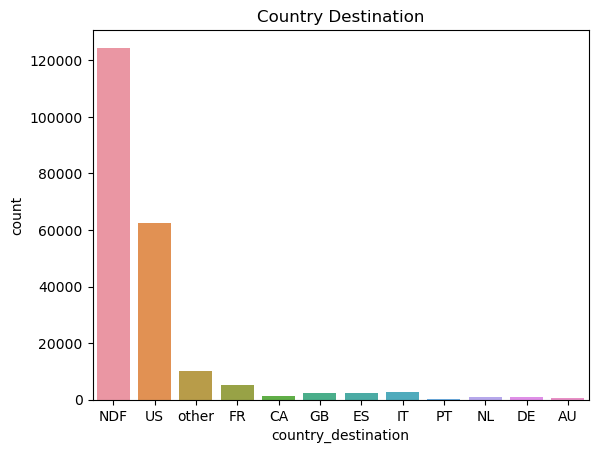

In [47]:
# target column: country_destination
## insight: the dataset is imbalanced: majority of the users have not done any booking.

sns.countplot(x="country_destination", data=train_df)
plt.title("Country Destination")
plt.show()

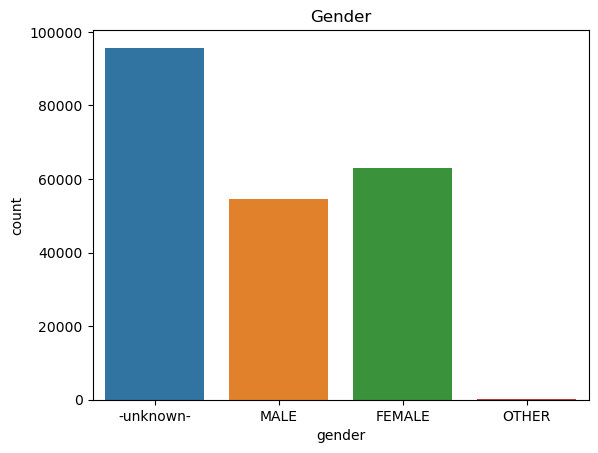

In [48]:
# gender
ax = sns.countplot(x="gender", data=train_df)
plt.title("Gender")
plt.show()

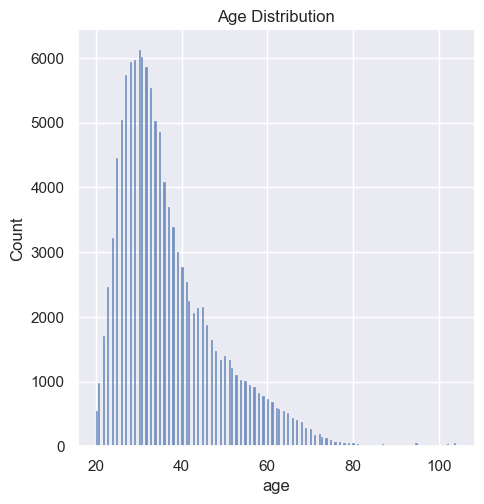

0 percentile value is 20.0
1 percentile value is 21.0
2 percentile value is 22.0
3 percentile value is 23.0
4 percentile value is 23.0
5 percentile value is 24.0
6 percentile value is 24.0
7 percentile value is 24.0
8 percentile value is 25.0
9 percentile value is 25.0
10 percentile value is 25.0
90 percentile value is 54.0:
91 percentile value is 55.0:
92 percentile value is 56.0:
93 percentile value is 58.0:
94 percentile value is 59.0:
95 percentile value is 61.0:
96 percentile value is 63.0:
97 percentile value is 65.0:
98 percentile value is 68.0:
99 percentile value is 72.0:
100 percentile value is 104.0:


In [ ]:
# age
sns.displot(train_df["age"].dropna(), label="Age")
plt.title("Age Distribution")
plt.show()

In [71]:
# clean age: remove outliers 
for i in range(0,11, 1): 
    print("{} percentile value is {}".format(i, np.percentile(train_df["age"].dropna(), i)))

for i in range(99, 101, 1):
    print("{} percentile value is {}:".format(i, np.percentile(train_df["age"].dropna(), i)))

# the upper bound 
upper_bound = np.percentile(train_df['age'].dropna(), 99)
lower_bound = np.percentile(train_df['age'].dropna(), 1)

# what is the best practice to do this? get rid of data or simply use median age.
train_df = train_df[(train_df["age"] < upper_bound) & (train_df["age"] > lower_bound)]

0 percentile value is 20.0
1 percentile value is 21.0
2 percentile value is 22.0
3 percentile value is 23.0
4 percentile value is 23.0
5 percentile value is 24.0
6 percentile value is 24.0
7 percentile value is 24.0
8 percentile value is 25.0
9 percentile value is 25.0
10 percentile value is 25.0
99 percentile value is 72.0:
100 percentile value is 104.0:


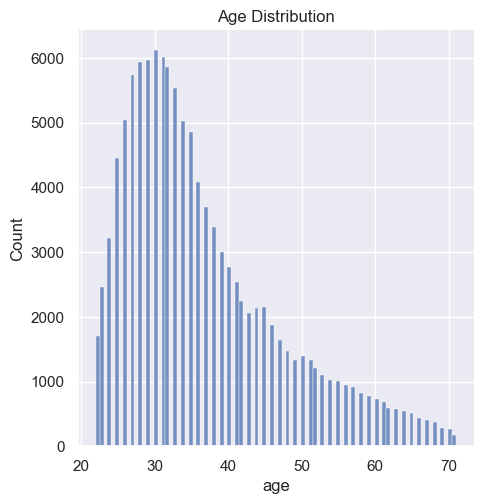

In [72]:
# plot age again 
sns.displot(train_df["age"].dropna(), label="Age")
plt.title("Age Distribution")
plt.show()

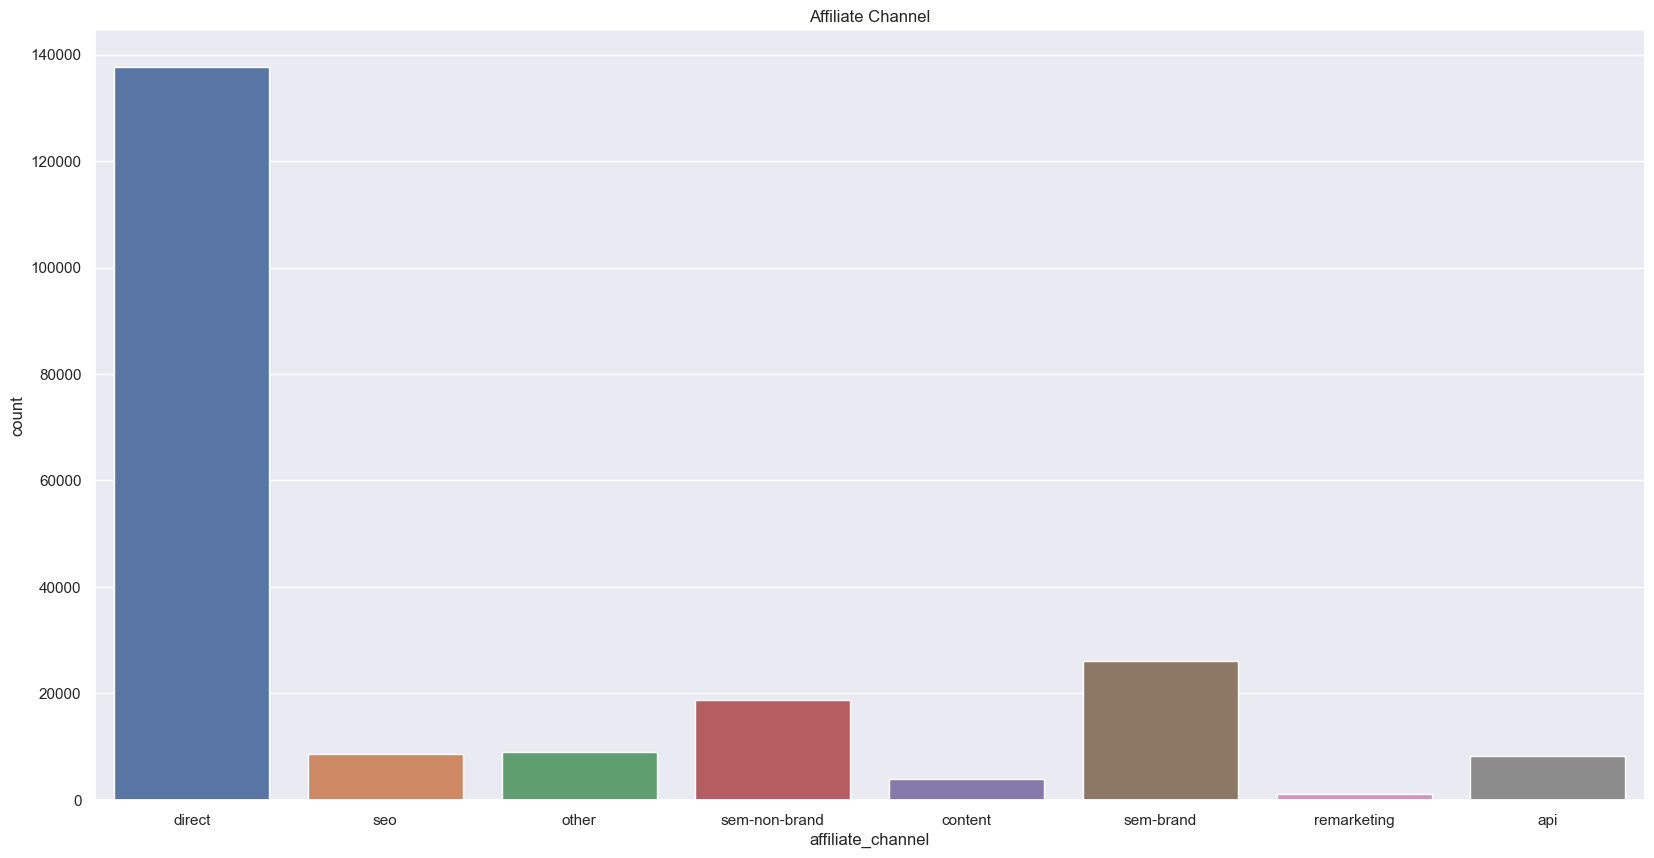

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(x="affiliate_channel", data=train_df)
plt.title("Affiliate Channel")
plt.show()

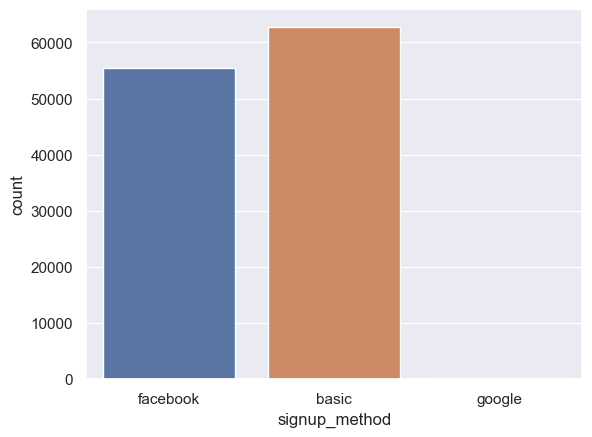

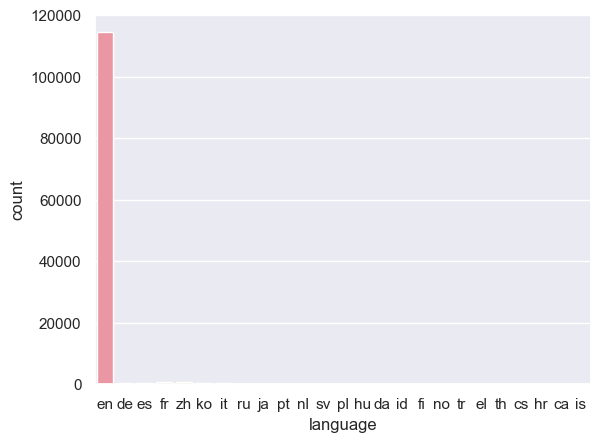

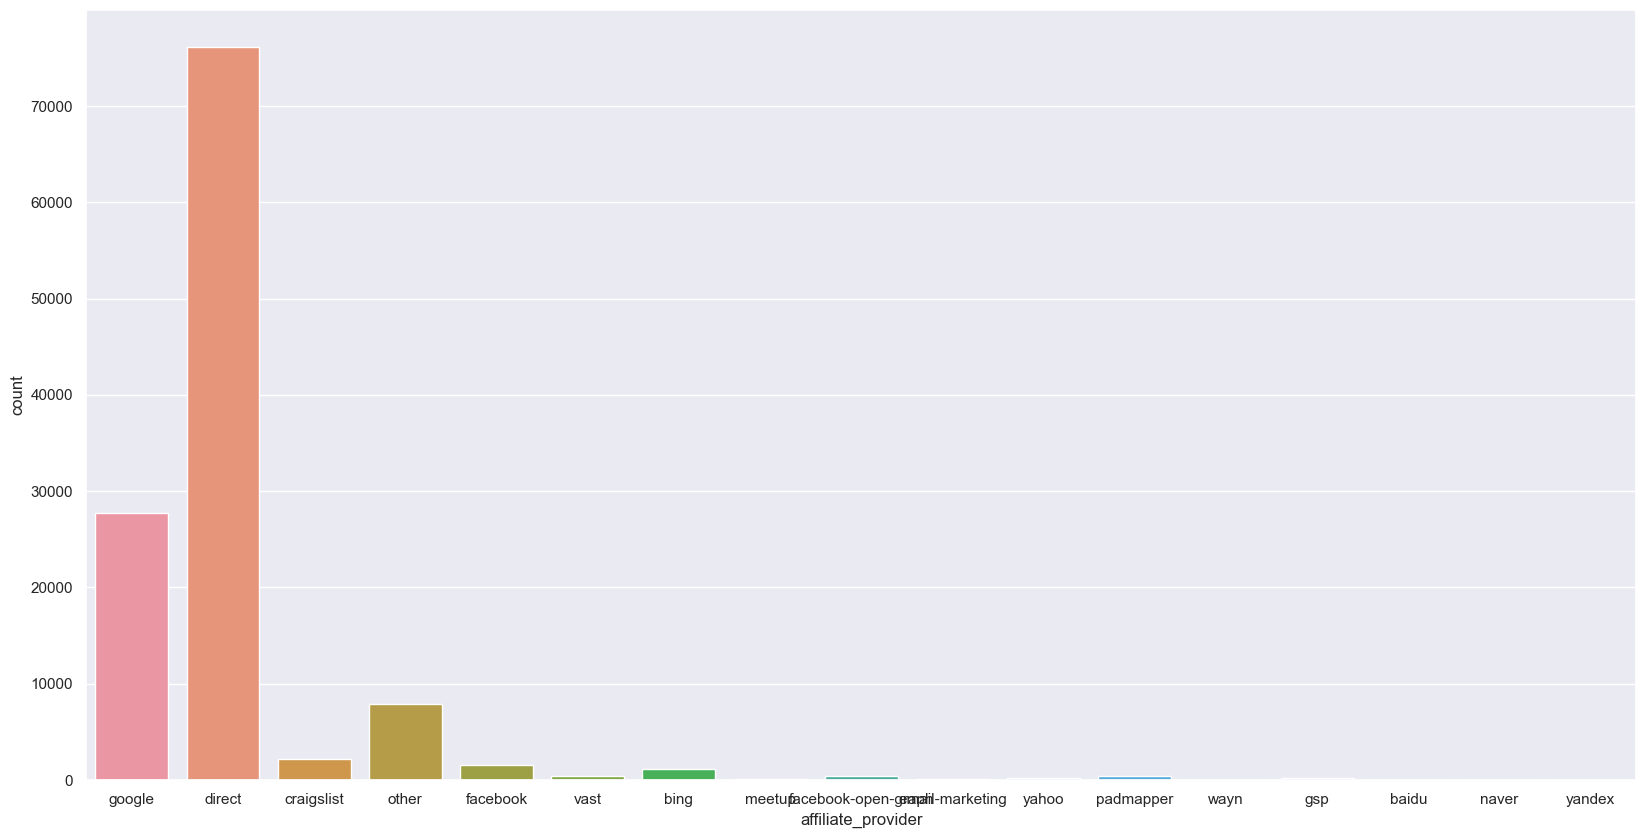

<Axes: xlabel='signup_app', ylabel='count'>

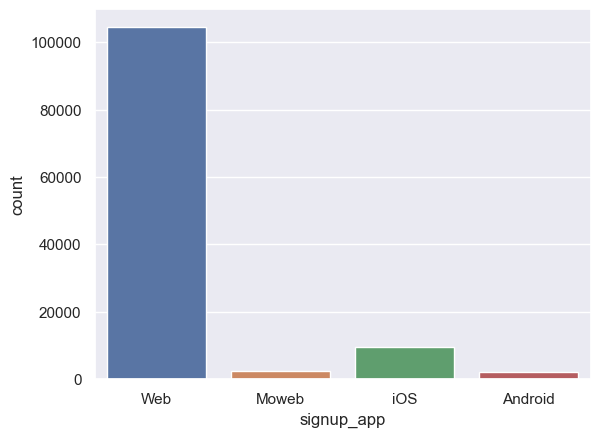

In [ ]:
sns.countplot(x="signup_method", data=train_df)
plt.show()
sns.countplot(x="language", data=train_df)
plt.show()
plt.figure(figsize=(20,10))
sns.countplot(x="affiliate_provider", data=train_df)
plt.show()
sns.countplot(x="signup_app", data=train_df)
plt.show()

In [78]:
train_df["date_account_created"] = pd.to_datetime(train_df["date_account_created"])
train_df["date_account_created_day"] = train_df.date_account_created.dt.weekday
train_df["date_account_created_month"] = train_df.date_account_created.dt.month
train_df["date_account_created_year"] = train_df.date_account_created.dt.year

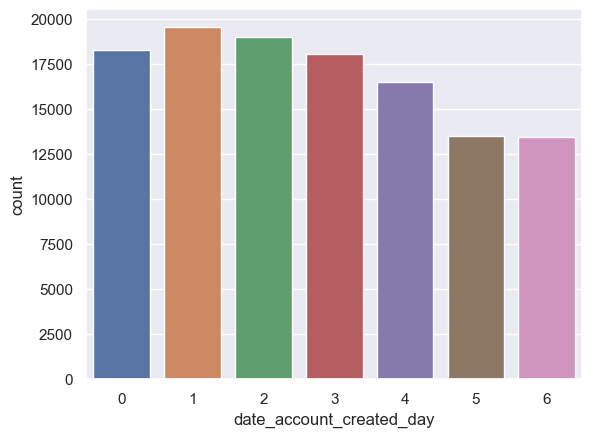

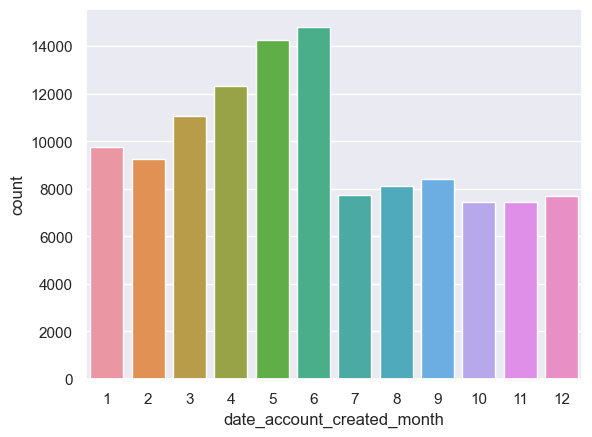

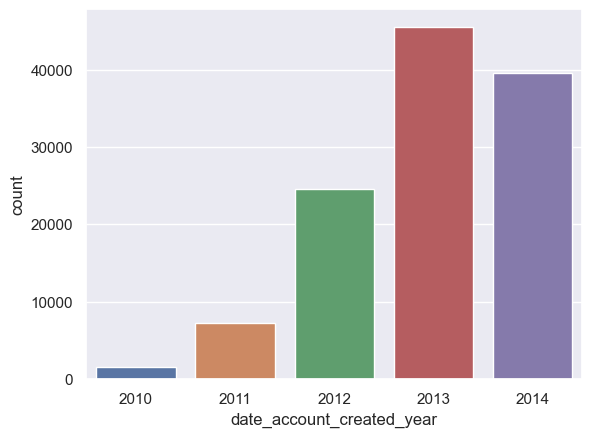

In [79]:
sns.countplot(x="date_account_created_day", data=train_df)
plt.show()
sns.countplot(x="date_account_created_month", data=train_df)
plt.show()
sns.countplot(x="date_account_created_year", data=train_df)
plt.show()

## Bivariate analysis

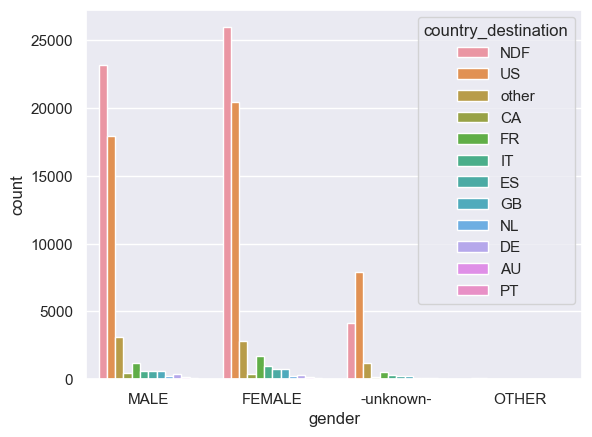

In [80]:
sns.countplot(x="gender", hue="country_destination", data=train_df)
plt.show()